# *<span style="color:red">Importing Librayries and Reading Data</span>*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("houserentdhaka_cleaned.csv")
df.head()

,Location,Area(sqft),Bed,Bath,Price(Taka)
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000
4,"Baridhara, Dhaka",2200,3,3,75000


In [3]:
df.shape

(28800, 5)

# *<span style="color:red">Data Cleaning</span>*

In [4]:
df.rename(columns={'Area(sqft)': 'Area_sqft'}, inplace=True)
df.rename(columns={'Price(Taka)': 'Price_taka'}, inplace=True)
df.head()

,Location,Area_sqft,Bed,Bath,Price_taka
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000
4,"Baridhara, Dhaka",2200,3,3,75000


In [5]:
df.isna().sum()

Location      0
Area_sqft     0
Bed           0
Bath          0
Price_taka    0
dtype: int64

In [6]:
df[df['Location']=='Dhaka']

,Location,Area_sqft,Bed,Bath,Price_taka
1195,Dhaka,700,2,1,10500
3213,Dhaka,1050,3,2,20000
9376,Dhaka,1100,3,3,18000
11494,Dhaka,1150,3,2,17500
16611,Dhaka,500,2,1,10000
16612,Dhaka,500,2,1,10000
16613,Dhaka,500,2,1,11000
16741,Dhaka,700,2,1,10500
16742,Dhaka,1486,3,3,20000
18280,Dhaka,1050,3,2,15500


In [7]:
df2 = df[df['Location']!='Dhaka']
df2.shape

(28787, 5)

# *<span style="color:red">Feature Engineering</span>*

In [9]:
df2.head()

,Location,Area_sqft,Bed,Bath,Price_taka
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000
4,"Baridhara, Dhaka",2200,3,3,75000


In [10]:
df2.Location.nunique()

729

### *<span style="color:#00CED1">Location Transformation for User Friendly Searching</span>*

In [11]:
def process_location(location):
    # Split by comma and strip whitespace
    parts = [part.strip() for part in location.split(",")]
    
    # Remove 'Dhaka' if it exists
    parts = [part for part in parts if part.lower() != "dhaka"]
    
    # Reverse the order
    parts.reverse()
    
    # Join the parts back into a single string
    return ", ".join(parts)

In [12]:
processed_locations = df2['Location'].apply(process_location)
processed_locations.head(10)

0                         Bashundhara R-A, Block H
1                                Tejgaon, Farmgate
2    Mohammadpur, Nobodoy Housing Society, Block B
3                               Gulshan, Gulshan 1
4                                        Baridhara
5                                  Bashundhara R-A
6                                        Baridhara
7                  Mohammadpur, PC Culture Housing
8                              Hazaribag, Jigatola
9                            Mirpur, West Kazipara
Name: Location, dtype: object

In [13]:
df3 = df2.copy()
df3['Location'] = processed_locations
df3.head()

,Location,Area_sqft,Bed,Bath,Price_taka
0,"Bashundhara R-A, Block H",1600,3,3,20000
1,"Tejgaon, Farmgate",900,2,2,20000
2,"Mohammadpur, Nobodoy Housing Society, Block B",1250,3,3,18000
3,"Gulshan, Gulshan 1",2200,3,4,75000
4,Baridhara,2200,3,3,75000


### *<span style="color:#00CED1">Adding new column called rent_per_sqft for further analysis<span>*

In [14]:
df4 = df3.copy()
df4['rent_per_sqft'] = df4['Price_taka']/df4['Area_sqft']
df4.head()

,Location,Area_sqft,Bed,Bath,Price_taka,rent_per_sqft
0,"Bashundhara R-A, Block H",1600,3,3,20000,12.500000
1,"Tejgaon, Farmgate",900,2,2,20000,22.222222
2,"Mohammadpur, Nobodoy Housing Society, Block B",1250,3,3,18000,14.400000
3,"Gulshan, Gulshan 1",2200,3,4,75000,34.090909
4,Baridhara,2200,3,3,75000,34.090909


In [15]:
df4.Location.nunique()

729

#### *<span style="color:#00CED1">Location which is a categorical variable has 729 unique values. So, we need to apply dimentionality reduction technique here to reduce number of Locations</span>*

In [16]:
Location_stats = df4.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
Location_stats.head(8)

Location
Mohammadpur                      757
Mirpur                           556
Mirpur, Section 12, Block D      417
Dhanmondi                        414
Mirpur, Section 12, Block E      411
Uttara, Sector 10                357
Mirpur, Ahmed Nagar, Paikpara    352
Mirpur, Kallyanpur               337
Name: Location, dtype: int64

In [17]:
Location_stats.values.sum()

np.int64(28787)

In [18]:
len(Location_stats)

729

## *<span style="color:red">Dimentionality Reduction</span>*
#### *<span style="color:#00CED1">Any location having <span style="color:red">less than 5</span> data points should be tagged as "<span style="color:red">Other</span>" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns</span>*

In [19]:
less_than_5 = Location_stats[Location_stats<5]
less_than_5

Location
Bangshal, Naya Bazar, Armanitola       4
Lalmatia, Block D                      4
Lalbagh, Lalbagh Road                  4
Khilgaon, West Nandipara, Road No 1    4
Dakshin Khan, Faydabad, Transmitter    4
                                      ..
Maghbazar, Old Elephant Road           1
Uttara, Sector 4, Road No 12           1
Aftab Nagar, Block F                   1
Uttara, Sector 12, Road No 17          1
Aftab Nagar, Block D                   1
Name: Location, Length: 202, dtype: int64

In [20]:
len(less_than_5)

202

In [21]:
df4.Location = df4.Location.apply(lambda x: 'Other' if x in less_than_5 else x)
df4.Location.nunique()

528

In [22]:
df4[df4['Location']=='Other'].head()

,Location,Area_sqft,Bed,Bath,Price_taka,rent_per_sqft
39,Other,800,3,2,15000,18.750000
69,Other,2420,3,4,45000,18.595041
135,Other,800,3,2,15000,18.750000
138,Other,1000,3,2,15000,15.000000
198,Other,1800,5,5,35000,19.444444


In [23]:
df4[df4['Location']=='Other']['Price_taka'].mean()

np.float64(18108.773672055428)

In [24]:
df4.shape

(28787, 6)

## *<span style="color:red">Outliers Removal Using Business Logic</span>*

In [25]:
df4.rent_per_sqft.describe()

count    28787.000000
mean        19.015292
std          6.553057
min          6.500000
25%         15.384615
50%         18.055556
75%         21.052632
max        228.571429
Name: rent_per_sqft, dtype: float64

### *<span style="color:red">3-Sigma Rule</span>*
#### *<span style="color:#00CED1">For a normal distribution with mean (μ) and standard deviation (σ):</span>*
##### *<span style="color:#00CED1">1. The range μ ± 1σ covers ~68% of the data.</span>*
##### *<span style="color:#00CED1">2. The range μ ± 2σ covers ~95% of the data.</span>*
##### *<span style="color:#00CED1">3. The range μ ± 3σ covers ~99.7% of the data.</span>*

In [26]:
df4[df4.rent_per_sqft>100]

,Location,Area_sqft,Bed,Bath,Price_taka,rent_per_sqft
131,"Bashundhara R-A, Block D",1100,2,2,140000,127.272727
646,"Gulshan, Gulshan 2",5800,4,4,650000,112.068966
23388,"Baridhara, Block K",3600,4,4,400000,111.111111
23688,"Baridhara, Block K",3600,4,4,400000,111.111111
26973,Shantinagar,2100,3,4,480000,228.571429


In [27]:
df4[df4.rent_per_sqft<10]

,Location,Area_sqft,Bed,Bath,Price_taka,rent_per_sqft
192,"Mirpur, Middle Paikpara",1600,3,3,15000,9.375000
454,"Khilgaon, Goran, East Goran",980,2,2,9000,9.183673
522,"Uttara, Sector 18, Rajuk Uttara Apartment Proj...",1654,3,3,14000,8.464329
901,"Uttara, Sector 18, Rajuk Uttara Apartment Proj...",1654,3,3,14000,8.464329
1141,Other,1000,3,2,9000,9.000000
...,...,...,...,...,...,...
28120,"Uttara, Sector 18, Rajuk Uttara Apartment Proj...",1654,3,4,15000,9.068924
28159,"Uttara, Sector 18, Rajuk Uttara Apartment Proj...",1654,3,4,14000,8.464329
28258,"Uttara, Sector 18, Rajuk Uttara Apartment Proj...",1654,3,4,14000,8.464329
28277,"Uttara, Sector 18, Rajuk Uttara Apartment Proj...",1654,3,4,14000,8.464329


In [49]:
#Removing rows using 3 sigma rule
def remove_rps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.rent_per_sqft)
        st = np.std(subdf.rent_per_sqft)
        reduced_df = subdf[(subdf.rent_per_sqft>(m-1.3*st)) & (subdf.rent_per_sqft<=(m+1.3*st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [50]:
df5 = remove_rps_outliers(df4)
df5.shape

(24036, 6)

In [51]:
df5.rent_per_sqft.describe()

count    24036.000000
mean        18.740161
std          5.504735
min          8.464329
25%         15.625000
50%         18.000000
75%         20.689655
max         83.333333
Name: rent_per_sqft, dtype: float64

In [52]:
df5[df5.rent_per_sqft<10]

,Location,Area_sqft,Bed,Bath,Price_taka,rent_per_sqft
5145,"Cantonment, Goltek",1050,3,3,10000,9.523810
5146,"Cantonment, Goltek",1100,3,3,10000,9.090909
5149,"Cantonment, Goltek",1270,3,3,12000,9.448819
5150,"Cantonment, Goltek",1240,3,3,12000,9.677419
5151,"Cantonment, Goltek",1100,3,3,10000,9.090909
...,...,...,...,...,...,...
23527,"Uttara, Sector 18, Rajuk Uttara Apartment Proj...",1654,3,4,15000,9.068924
23528,"Uttara, Sector 18, Rajuk Uttara Apartment Proj...",1654,3,4,15000,9.068924
23529,"Uttara, Sector 18, Rajuk Uttara Apartment Proj...",1654,3,4,14000,8.464329
23530,"Uttara, Sector 18, Rajuk Uttara Apartment Proj...",1654,3,4,14000,8.464329


In [53]:
df5[df5.rent_per_sqft>80]

,Location,Area_sqft,Bed,Bath,Price_taka,rent_per_sqft
3436,"Baridhara, Block K",3000,3,3,250000,83.333333
3460,"Baridhara, Block K",3000,4,4,250000,83.333333
3461,"Baridhara, Block K",3000,4,4,250000,83.333333


In [54]:
df5[df5['Area_sqft']>5000]

,Location,Area_sqft,Bed,Bath,Price_taka,rent_per_sqft
3248,Baridhara,5500,4,5,350000,63.636364
3263,Baridhara,6300,4,5,400000,63.492063
3264,Baridhara,6300,4,5,400000,63.492063
3279,Baridhara,6300,4,5,400000,63.492063


### *<span style="color:red">Value Per Unit of Utility*</span>
#### *<span style="color:#00CED1">Let's check if for a given location how does the 2 Bedrooms and 3 Bedrooms property rent look like</span>*

In [57]:
def plot_scatter_chart(df,location):
    bed2 = df[(df.Location==location) & (df.Bed==2)]
    bed3 = df[(df.Location==location) & (df.Bed==3)]
    matplotlib.rcParams['figure.figsize'] = (10,7)
    plt.scatter(bed2['Area_sqft'], bed2['rent_per_sqft'], color='red', marker='*', label='2 Bed')
    plt.scatter(bed3['Area_sqft'], bed3['rent_per_sqft'], color='blue', marker='^', label='3 Bed')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Rent Per Square Feet")
    plt.title(location)
    plt.style.use('dark_background')
    plt.legend()
    plt.show()

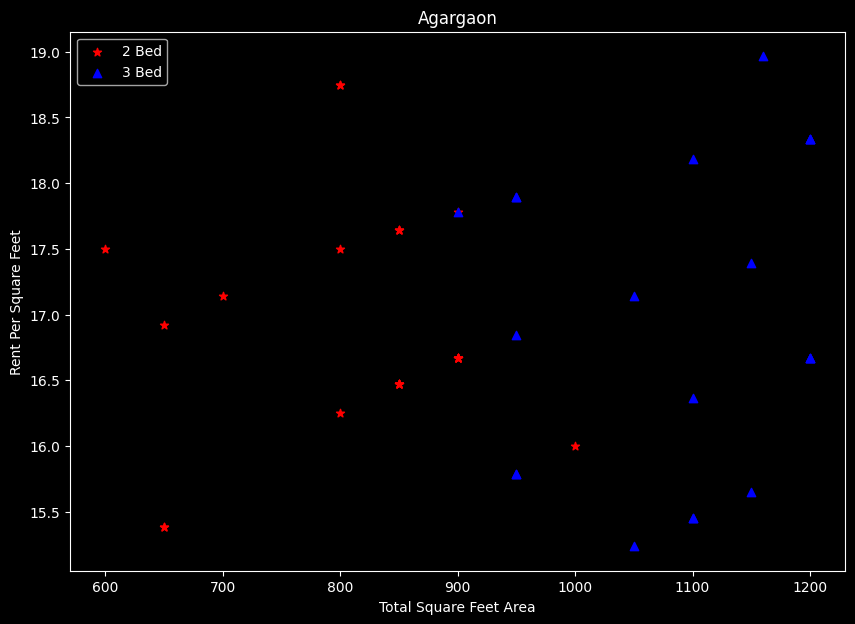

In [58]:
plot_scatter_chart(df5, 'Agargaon')

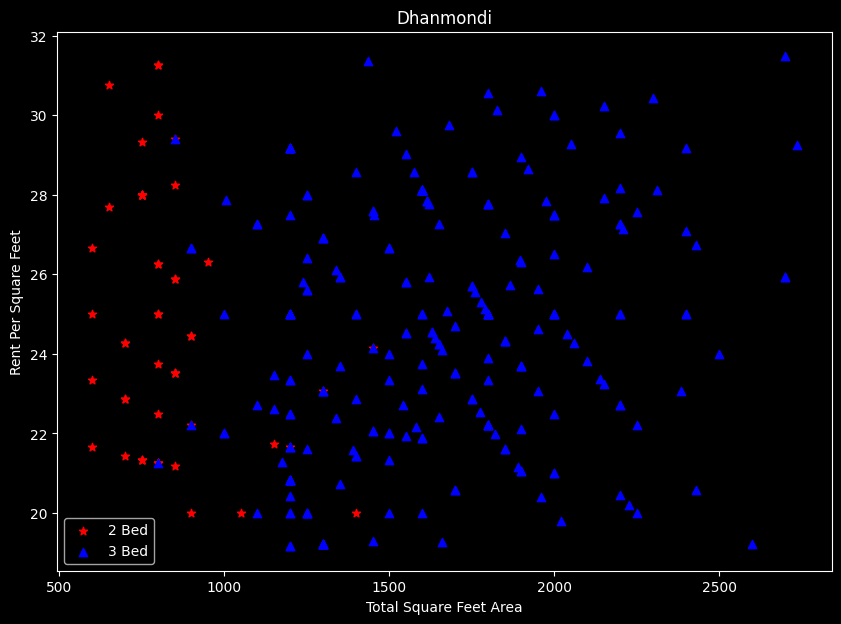

In [59]:
plot_scatter_chart(df5, 'Dhanmondi')

#### *<span style="color:#00CED1">We should also remove properties where for same location, the rent of (for example) 3 Bedroom apartment is less than 2 Bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bedroom, i.e.</span>*

```python
{
    '1' : {
        'mean': 12,
        'percentile': 0.1,
        'count': 34
    },
    '2' : {
        'mean': 14,
        'percentile': 0.1,
        'count': 22
    },    
}

#### *<span style="color:#00CED1">Now we can remove those 2 Bedroom apartments whose price_per_sqft is less than percentile-based threshold of 1 Bedroom apartments</span>*

In [60]:
def remove_bhk_outliers(df, percentile=0.1, min_count=5):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
        # Calculate statistics for each bedroom count
        for bhk, bhk_df in location_df.groupby('Bed'):
            if len(bhk_df) >= min_count:  # Only consider groups with enough samples
                bhk_stats[bhk] = {
                    'mean': np.mean(bhk_df.rent_per_sqft),
                    'percentile': np.percentile(bhk_df.rent_per_sqft, percentile * 100),
                    'count': bhk_df.shape[0]
                }
        # Identify outliers
        for bhk, bhk_df in location_df.groupby('Bed'):
            if bhk - 1 in bhk_stats:  # Check if B-1 stats exist
                stats = bhk_stats[bhk - 1]
                if stats['count'] >= min_count:  # Only apply logic if enough samples exist
                    # Use percentile as threshold (less strict than mean)
                    threshold = stats['percentile']
                    outliers = bhk_df[bhk_df.rent_per_sqft < threshold]
                    exclude_indices = np.append(exclude_indices, outliers.index.values)
    
    # Drop outliers and return the cleaned DataFrame
    return df.drop(exclude_indices, axis='index')

In [61]:
df5.shape

(24036, 6)

In [62]:
df6 = remove_bhk_outliers(df5, 0.05, min_count=14)
df6.shape

(22257, 6)

#### *<span style="color:#00CED1">Comparing Before and After processing for location:</span> <span style="color:red">Uttara, Sector 10</span>*

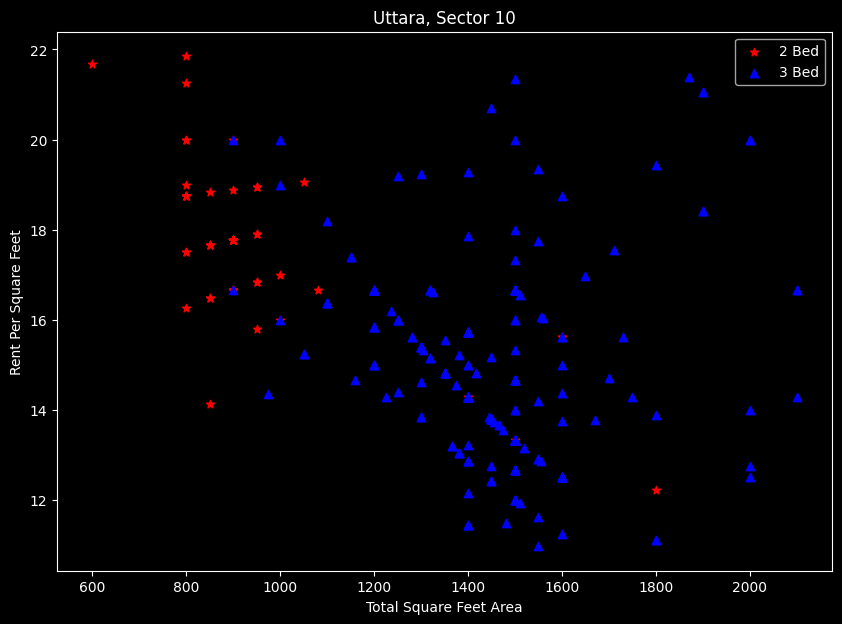

In [63]:
plot_scatter_chart(df5, 'Uttara, Sector 10')

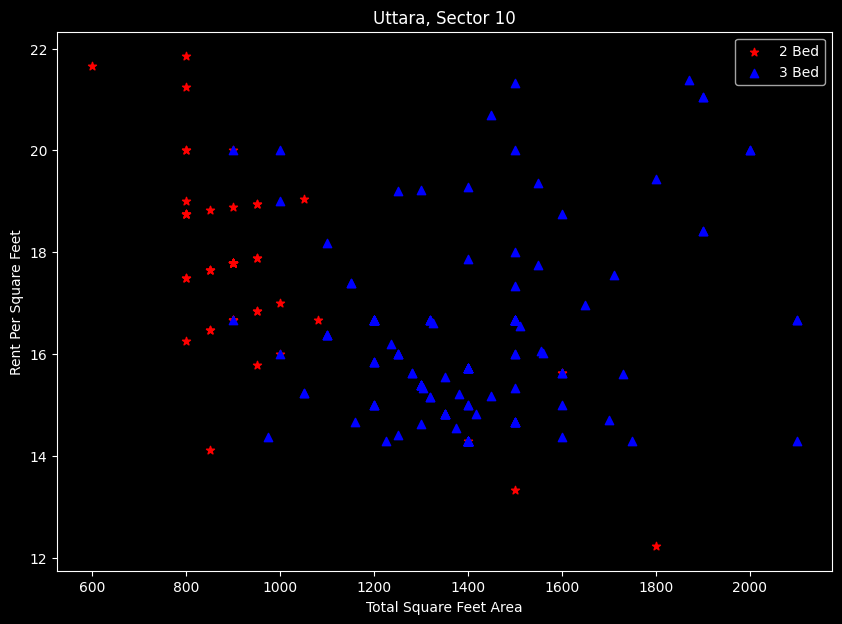

In [64]:
plot_scatter_chart(df6, 'Uttara, Sector 10')

#### *<span style="color:#00CED1">Comparing Before and After processing for location:</span> <span style="color:red">Mirpur</span>*

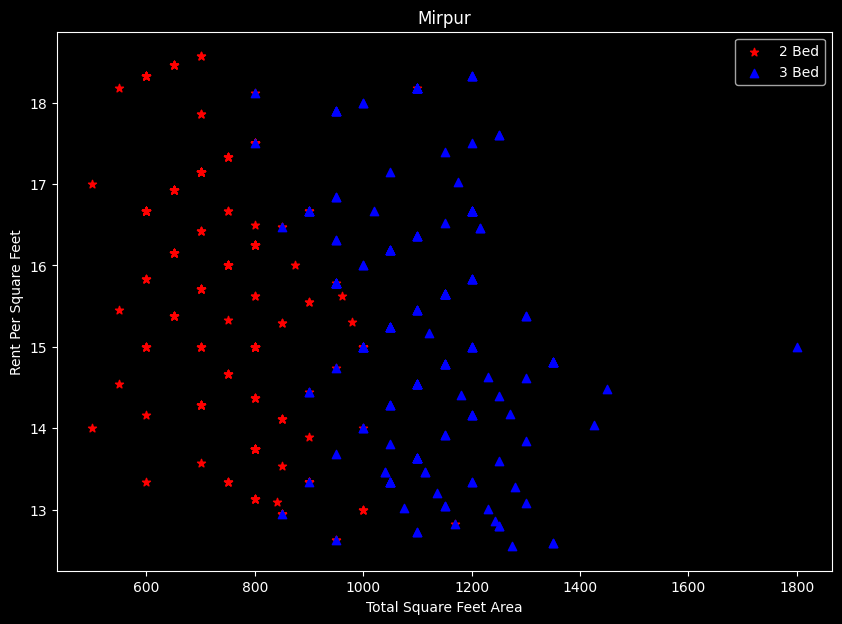

In [65]:
plot_scatter_chart(df5, 'Mirpur')

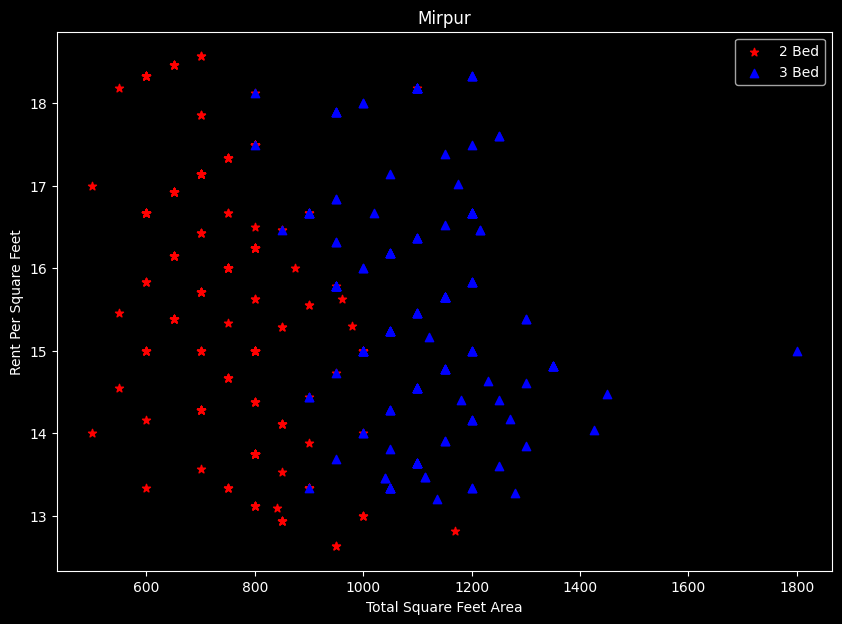

In [66]:
plot_scatter_chart(df6, 'Mirpur')

#### *<span style="color:#00CED1">Analizing removed rows for parameter tuning</span>*

In [67]:
# Identify removed rows
removed_indices = list(set(df5.index) - set(df6.index))
removed_rows = df5.loc[removed_indices]

In [68]:
len(removed_rows)

1779

In [69]:
removed_rows[['Location', 'Bed', 'rent_per_sqft']].describe()

,Bed,rent_per_sqft
count,1779.000000,1779.000000
mean,2.983137,15.070175
std,0.276054,2.457826
min,2.000000,9.000000
25%,3.000000,13.333333
50%,3.000000,14.814815
75%,3.000000,16.666667
max,5.000000,30.303030


In [70]:
deleted_analysis = pd.DataFrame(removed_rows['Location'].value_counts())
deleted_analysis.head()

,count
Location,
"Mirpur, Ahmed Nagar, Paikpara",107
"Uttara, Sector 10",105
"Bashundhara R-A, Block G",89
"Mirpur, Section 1",56
"Mirpur, Middle Paikpara",55


In [71]:
df5[df5['Location'] == 'Mohammadpur, PC Culture Housing'].shape[0]

232

### *<span style="color:red">Histograms of rent_per_sqft, Bedrooms and Bathrooms</span>*

Text(0, 0.5, 'Count')

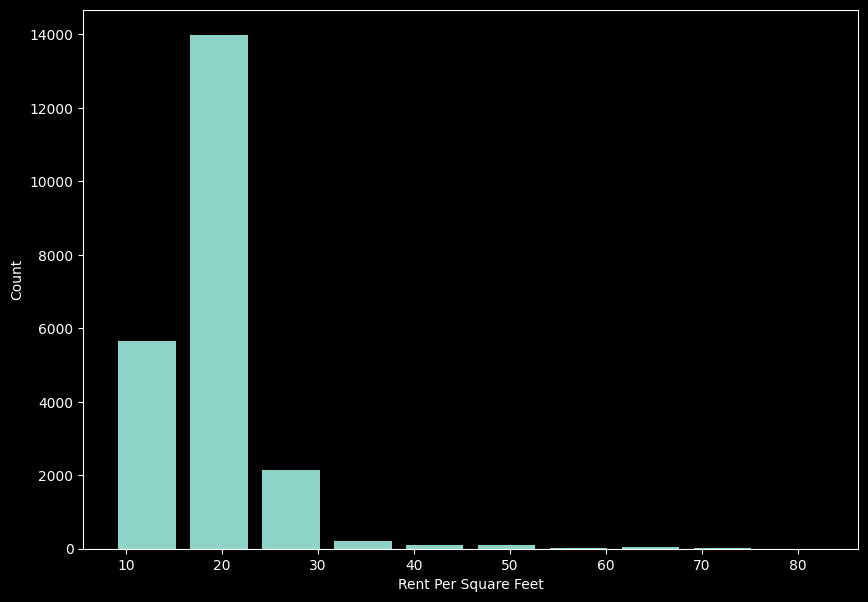

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
plt.hist(df6.rent_per_sqft, rwidth=0.8)
plt.xlabel("Rent Per Square Feet")
plt.ylabel("Count")

In [78]:
df6.Bed.unique()

array([2, 3, 4, 1, 5, 6])

In [79]:
df6[df6.Bath>5]

,Location,Area_sqft,Bed,Bath,Price_taka,rent_per_sqft
7030,"Gulshan, Gulshan 2",4500,6,6,280000,62.222222
7040,"Gulshan, Gulshan 2",4300,5,6,280000,65.116279
18964,"Mohammadpur, Mohammadi Housing LTD.",2200,5,6,40000,18.181818
22149,"Tejgaon, Tejturi Bazar",2450,6,6,60000,24.489796
22274,"Uttara, Sector 1",2750,5,6,75000,27.272727


Text(0, 0.5, 'Count')

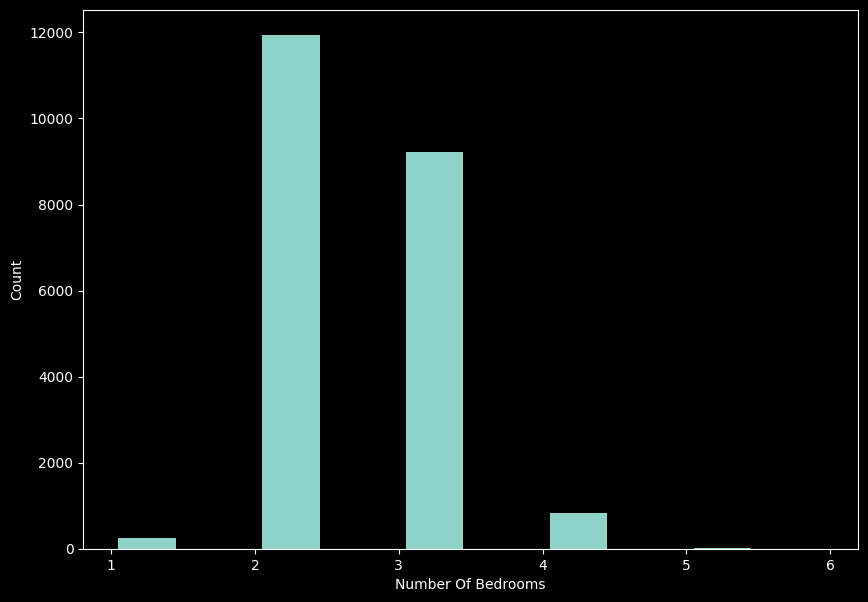

In [80]:
plt.figure(figsize = (10, 7))
plt.hist(df6.Bed, rwidth=0.8)
plt.xlabel("Number Of Bedrooms")
plt.ylabel("Count")

In [81]:
df6.Bath.unique()

array([2, 3, 1, 4, 5, 6])

In [82]:
df6[df6.Bath>5]

,Location,Area_sqft,Bed,Bath,Price_taka,rent_per_sqft
7030,"Gulshan, Gulshan 2",4500,6,6,280000,62.222222
7040,"Gulshan, Gulshan 2",4300,5,6,280000,65.116279
18964,"Mohammadpur, Mohammadi Housing LTD.",2200,5,6,40000,18.181818
22149,"Tejgaon, Tejturi Bazar",2450,6,6,60000,24.489796
22274,"Uttara, Sector 1",2750,5,6,75000,27.272727


Text(0, 0.5, 'Count')

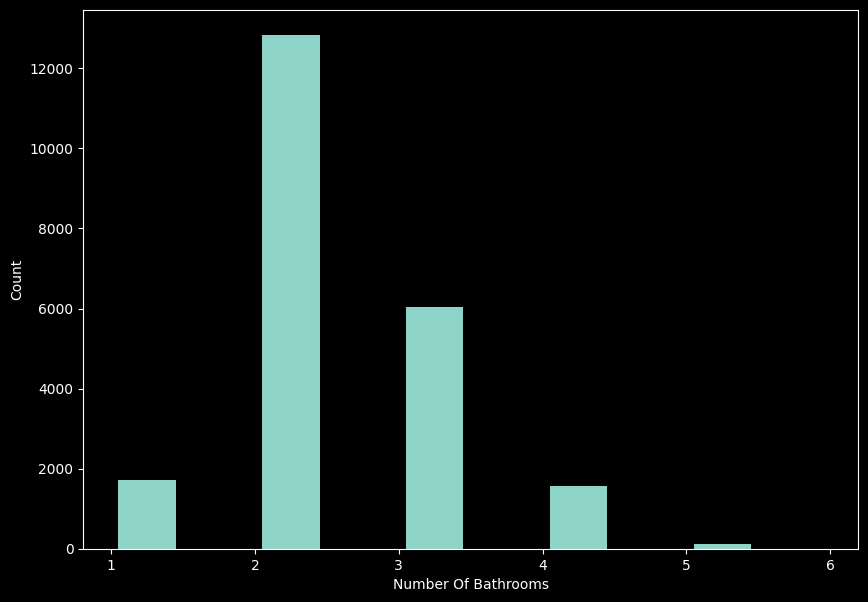

In [83]:
plt.hist(df6.Bath, rwidth=0.8)
plt.xlabel("Number Of Bathrooms")
plt.ylabel("Count")

#### *<span style="color:#00CED1">It is unusual to have 2 more bathrooms than number of bedrooms in a home</span>*

In [85]:
df6[df6.Bath>=df6.Bed+2]

,Location,Area_sqft,Bed,Bath,Price_taka,rent_per_sqft
2413,Banani,2410,3,5,80000,33.195021
2496,Banani DOHS,3000,3,5,130000,43.333333
3418,"Baridhara, Block J",2200,3,5,50000,22.727273
3886,"Bashundhara R-A, Block A",2100,3,5,60000,28.571429
3887,"Bashundhara R-A, Block A",2100,3,5,60000,28.571429
4136,"Bashundhara R-A, Block D",3000,3,5,55000,18.333333
4207,"Bashundhara R-A, Block D",1700,2,4,30000,17.647059
4282,"Bashundhara R-A, Block D",2200,3,5,30000,13.636364
4767,"Bashundhara R-A, Block I",1300,2,4,30000,23.076923
6392,Dhanmondi,2200,3,5,62000,28.181818


#### *<span style="color:#00CED1">Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed</span>*

In [86]:
df6.shape

(22257, 6)

In [87]:
df7 = df6[df6.Bath<df6.Bed+2]
df7.shape

(22237, 6)

In [88]:
df7.head()

,Location,Area_sqft,Bed,Bath,Price_taka,rent_per_sqft
0,Adabor,800,2,2,14000,17.50
2,Adabor,800,2,2,16000,20.00
3,Adabor,800,2,2,15000,18.75
4,Adabor,800,2,2,16000,20.00
5,Adabor,800,2,2,15000,18.75


In [89]:
df8 = df7.drop('rent_per_sqft',axis=1)
df8.head()

,Location,Area_sqft,Bed,Bath,Price_taka
0,Adabor,800,2,2,14000
2,Adabor,800,2,2,16000
3,Adabor,800,2,2,15000
4,Adabor,800,2,2,16000
5,Adabor,800,2,2,15000


# *<span style="color:red">One Hot Encoding on Location Column</span>*

In [90]:
df9 = pd.get_dummies(df8, drop_first=True, prefix='', prefix_sep='')
df9.head()

,Area_sqft,Bed,Bath,Price_taka,"Adabor, Baitul Aman Housing Society","Adabor, Comfort Housing","Adabor, Janata Housing Society","Adabor, Mansurabad Housing Society, Block A","Adabor, Mansurabad Housing Society, Block B","Adabor, Mansurabad Housing Society, Block C",...,"Uttara, Sector 15","Uttara, Sector 15, Block C1","Uttara, Sector 18, Rajuk Uttara Apartment Project, Block A","Uttara, Sector 3","Uttara, Sector 4","Uttara, Sector 5","Uttara, Sector 6","Uttara, Sector 7","Uttara, Sector 9",Zafrabad
0,800,2,2,14000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,800,2,2,16000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,800,2,2,15000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,800,2,2,16000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,800,2,2,15000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
df10 = df9.drop('Other',axis=1)
df10.head()

,Area_sqft,Bed,Bath,Price_taka,"Adabor, Baitul Aman Housing Society","Adabor, Comfort Housing","Adabor, Janata Housing Society","Adabor, Mansurabad Housing Society, Block A","Adabor, Mansurabad Housing Society, Block B","Adabor, Mansurabad Housing Society, Block C",...,"Uttara, Sector 15","Uttara, Sector 15, Block C1","Uttara, Sector 18, Rajuk Uttara Apartment Project, Block A","Uttara, Sector 3","Uttara, Sector 4","Uttara, Sector 5","Uttara, Sector 6","Uttara, Sector 7","Uttara, Sector 9",Zafrabad
0,800,2,2,14000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,800,2,2,16000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,800,2,2,15000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,800,2,2,16000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,800,2,2,15000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
df10.shape

(22237, 525)

# *<span style="color:red">Input and Output processing</span>*

In [93]:
X = df10.drop('Price_taka', axis=1)
y = df10['Price_taka']

In [95]:
X.head()

,Area_sqft,Bed,Bath,"Adabor, Baitul Aman Housing Society","Adabor, Comfort Housing","Adabor, Janata Housing Society","Adabor, Mansurabad Housing Society, Block A","Adabor, Mansurabad Housing Society, Block B","Adabor, Mansurabad Housing Society, Block C","Adabor, Mansurabad Housing Society, Block D",...,"Uttara, Sector 15","Uttara, Sector 15, Block C1","Uttara, Sector 18, Rajuk Uttara Apartment Project, Block A","Uttara, Sector 3","Uttara, Sector 4","Uttara, Sector 5","Uttara, Sector 6","Uttara, Sector 7","Uttara, Sector 9",Zafrabad
0,800,2,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,800,2,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,800,2,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,800,2,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,800,2,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [96]:
y.head()

0    14000
2    16000
3    15000
4    16000
5    15000
Name: Price_taka, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# *<span style="color:red">Model Analysis</span>*

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

lr_model = LinearRegression()
rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()
xgb_model = XGBRegressor()

In [99]:
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [100]:
lr_model.score(X_test, y_test)

0.8971307438378271

In [101]:
rf_model.score(X_test, y_test)

0.9497696996441296

In [102]:
dt_model.score(X_test, y_test)

0.9387355876493066

In [103]:
xgb_model.score(X_test, y_test)

0.932774543762207

## *<span style="color:red">Use K Fold cross validation to measure accuracy of Models</span>*

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=8)

In [105]:
cross_score = cross_val_score(LinearRegression(), X, y, cv=cv)
cross_score.mean()

np.float64(0.8933081072599801)

In [106]:
cross_score = cross_val_score(RandomForestRegressor(), X, y, cv=cv)
cross_score.mean()

np.float64(0.943742301551395)

In [107]:
cross_score = cross_val_score(DecisionTreeRegressor(), X, y, cv=cv)
cross_score.mean()

np.float64(0.9348657342097569)

In [108]:
cross_score = cross_val_score(XGBRegressor(), X, y, cv=cv)
cross_score.mean()

np.float64(0.930772852897644)

#### *<span style="color:#00CED1">After general testing of 4 different models, <span style="color:red">RandomForestRegressor</span> and <span style="color:red">XGBRegressor</span> gave us average score above <span style="color:red">93%</span>*
#### *<span style="color:#00CED1">Now let's use Hyper Parameter Tuning on these models to get the best model to train</span>*

## *<span style="color:red">Find best model using GridSearchCV</span>*

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [113]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'random_forest_regressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100, 300, 500],
                'max_depth': [3, 6, None],
                'max_features': ['sqrt', 'log2'],
                'min_samples_split': [2, 5]
            }
        },
        'xgb_regressor': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [100, 300, 500],
                'max_depth': [3, 6],
                'learning_rate': [0.01, 0.1],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_jobs=-1, error_score='raise')
        gs.fit(X,y)
        scores.append(
            {
                'model': algo_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_
            }
        )
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [115]:
result = find_best_model_using_gridsearchcv(X, y)

In [116]:
result

,model,best_score,best_params
0,random_forest_regressor,0.948923,"{'max_depth': None, 'max_features': 'log2', 'm..."
1,xgb_regressor,0.930034,"{'colsample_bytree': 0.8, 'learning_rate': 0.1..."


#### *<span style="color:turquoise">We can see the <span style="color:red">RandomForestRegressor</span> came out with the Best_Score</span> <span style="color:red">94.89%</span>*
#### *<span style="color:turquoise">So, we will go for this model with the <span style="color:red">Best Parameters</span></span>*

In [119]:
result['best_params'][0]

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 300}

# *<span style="color:red">Final Model Building</span>*

In [122]:
from sklearn.ensemble import RandomForestRegressor

final_model = RandomForestRegressor(n_estimators=300, min_samples_split=2, max_features='log2', max_depth=None, n_jobs=-1)
final_model.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=300, n_jobs=-1)

In [123]:
final_model.score(X_test, y_test)

0.9503504440733663

In [124]:
print(X.columns)

Index(['Area_sqft', 'Bed', 'Bath', 'Adabor, Baitul Aman Housing Society',
       'Adabor, Comfort Housing', 'Adabor, Janata Housing Society',
       'Adabor, Mansurabad Housing Society, Block A',
       'Adabor, Mansurabad Housing Society, Block B',
       'Adabor, Mansurabad Housing Society, Block C',
       'Adabor, Mansurabad Housing Society, Block D',
       ...
       'Uttara, Sector 15', 'Uttara, Sector 15, Block C1',
       'Uttara, Sector 18, Rajuk Uttara Apartment Project, Block A',
       'Uttara, Sector 3', 'Uttara, Sector 4', 'Uttara, Sector 5',
       'Uttara, Sector 6', 'Uttara, Sector 7', 'Uttara, Sector 9', 'Zafrabad'],
      dtype='object', length=524)


In [125]:
np.where(X.columns=='Uttara, Sector 15')

(array([514]),)

In [151]:
def predict_price(Location, Area_sqft, Bed, Bath):
    try:
        if Location not in X.columns[3:]:  # Assuming first 3 columns are Area_sqft, Bed, Bath
            raise ValueError(f"Location '{Location}' not found in the model's training data.")
        # Create a dictionary for input data
        input_data = {
            'Area_sqft': [Area_sqft],
            'Bed': [Bed],
            'Bath': [Bath]
        }
        # Add location columns (one-hot encoding)
        for loc in X.columns[3:]:
            input_data[loc] = [1 if loc == Location else 0]
            
        input_df = pd.DataFrame(input_data, columns=X.columns)
        
        # Predict price
        predicted_price = round(final_model.predict(input_df)[0],2)
        return predicted_price
    
    except Exception as e:
        print(f"Error: {e}")
        return None

In [154]:
predict_price('Gulshan, Gulshan 1', 1500, 3, 3)

np.float64(48822.18)

 # *<span style="color:red">Exporting the Model</span>*

In [155]:
import pickle
with open("DhakaRentPrediction_final.pkl","wb") as f:
    pickle.dump(final_model, f)

In [156]:
import json

columns = {
    'data_columns': list(X.columns)
}

with open("columns_final.json", "w") as f:
    f.write(json.dumps(columns))